In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Javascript, display
display(Javascript("""
 function ClickConnect(){
    console.log("Working");
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
}
setInterval(ClickConnect,60000)
"""))
!pip install ultralytics

Mounted at /content/drive


<IPython.core.display.Javascript object>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# AFTER REFINING DATA SET - 8th round Yolov11 best weights single prediction test fails badly (classifies a lemon as bread)


from ultralytics import YOLO

# Cargar los mejores pesos del entrenamiento con mejores métrics (Yolov11 3rd round)
model = YOLO('/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/Yolov11 1sr trainnig round/fine_tune_freezing3rd round Yolov8/train/weights/best.pt')  # Path to latest trained weights

data_yaml_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data.yaml'

# Entrenamiento con las capas congeladas
results = model.train(
    data=data_yaml_path,
    epochs=30,
    imgsz=640,
    lr0=0.0001,
    optimizer="AdamW",
    patience=15,
    mosaic=True,
    augment=True,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    flipud=0.5,
    fliplr=0.5,
    project="/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation",
    batch=16
)

print("Entrenamiento con capas congeladas finalizado.")


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/Yolov11 1sr trainnig round/fine_tune_freezing3rd round Yolov8/train/weights/best.pt, data=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data.yaml, epochs=30, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation, name

train: Scanning /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/train/labels/bread... 3878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3878/3878 [00:51<00:00, 75.55it/s] 


train: New cache created: /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/train/labels/bread.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/validation/labels/bread.cache... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train3/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.28G      0.445      0.675      1.109          8        640: 100%|██████████| 243/243 [01:44<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.33it/s]

                   all        600        600      0.744      0.867      0.895       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.17G     0.3763     0.5881      1.065         19        640: 100%|██████████| 243/243 [01:41<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.32it/s]

                   all        600        600       0.82      0.886      0.925      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.16G     0.3525     0.5548       1.05         17        640: 100%|██████████| 243/243 [01:37<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.85it/s]

                   all        600        600       0.86      0.877      0.945      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.15G     0.3373      0.547      1.039         18        640: 100%|██████████| 243/243 [01:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.85it/s]

                   all        600        600      0.861      0.894      0.951      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.17G      0.325     0.5211      1.032         16        640: 100%|██████████| 243/243 [01:37<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.32it/s]

                   all        600        600      0.851      0.892      0.942      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.16G     0.3208     0.5193      1.031         19        640: 100%|██████████| 243/243 [01:38<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all        600        600      0.864      0.898      0.947      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.16G     0.3202     0.5154       1.03         13        640: 100%|██████████| 243/243 [01:39<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.58it/s]

                   all        600        600      0.839      0.881      0.931      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.15G     0.3149     0.5147      1.025         11        640: 100%|██████████| 243/243 [01:37<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.02it/s]

                   all        600        600      0.872      0.892       0.95      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.17G     0.3089     0.5049      1.029         19        640: 100%|██████████| 243/243 [01:35<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.92it/s]

                   all        600        600      0.831      0.912      0.943       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.16G     0.3144     0.5074      1.029         14        640: 100%|██████████| 243/243 [01:36<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]

                   all        600        600      0.864      0.891      0.948      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.16G     0.3139     0.5059      1.025         19        640: 100%|██████████| 243/243 [01:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.14it/s]

                   all        600        600      0.857      0.895      0.946      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.15G     0.3113     0.5113      1.026         17        640: 100%|██████████| 243/243 [01:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.31it/s]

                   all        600        600      0.857      0.899      0.949      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.17G     0.3013     0.4911      1.019         17        640: 100%|██████████| 243/243 [01:41<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        600        600      0.864      0.874      0.942      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.16G     0.3034     0.5017      1.023         17        640: 100%|██████████| 243/243 [01:40<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.43it/s]

                   all        600        600      0.871      0.868      0.943      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.16G     0.2989     0.5031      1.015         12        640: 100%|██████████| 243/243 [01:36<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        600        600      0.867      0.872      0.942      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.15G     0.2975     0.4897      1.016         16        640: 100%|██████████| 243/243 [01:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.77it/s]

                   all        600        600      0.863       0.88      0.942      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.17G     0.2981     0.4899      1.015         12        640: 100%|██████████| 243/243 [01:37<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.25it/s]

                   all        600        600      0.862      0.883      0.943      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.16G     0.2978     0.4901      1.016         16        640: 100%|██████████| 243/243 [01:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]

                   all        600        600      0.844      0.874      0.939      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.16G      0.297     0.4932      1.012         17        640: 100%|██████████| 243/243 [01:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.19it/s]

                   all        600        600      0.867       0.86      0.937      0.932
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 4, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



19 epochs completed in 0.576 hours.
Optimizer stripped from /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train3/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train3/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train3/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 1509

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.33it/s]


                   all        600        600      0.848      0.895      0.935      0.933
                 bread        300        300      0.849      0.863      0.927      0.923
             not_bread        300        300      0.847      0.927      0.942      0.942
Speed: 0.3ms preprocess, 8.6ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train3
Entrenamiento con capas congeladas finalizado.


In [ ]:
# AFTER REFINING DATA SET - 8th round Yolov8 best weights single prediction test fails badly (classifies a lemon as bread)


from ultralytics import YOLO

# Cargar los mejores pesos del entrenamiento con mejores métrics (Yolov8 3rd round)
model = YOLO('/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train3/weights/best.pt')

data_yaml_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data.yaml'

# Entrenamiento con las capas congeladas
results = model.train(
    data=data_yaml_path,  # Ruta al archivo data.yaml
    epochs=30,
    imgsz=640,
    lr0=0.00005,
    optimizer="SGD",  # Switch to SGD for sharper classification
    momentum=0.9,
    weight_decay=0.0001,
    patience=15,
    mosaic=1,  # Enable mosaic at start
    augment=True,
    hsv_h=0.005,  # Less color augmentation
    hsv_s=0.5,
    hsv_v=0.3,
    flipud=0.5,
    fliplr=0.5,
    project="/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation",
    batch=16  # Tamaño del batch
)

print("Entrenamiento con capas congeladas finalizado.")


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train3/weights/best.pt, data=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data.yaml, epochs=30, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation, name=train4, 

train: Scanning /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/train/labels/bread.cache... 3878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3878/3878 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/validation/labels/bread.cache... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train4/labels.jpg... 
optimizer: SGD(lr=5e-05, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.24G     0.3168     0.5194      1.026          8        640: 100%|██████████| 243/243 [01:52<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

                   all        600        600      0.873      0.887      0.948      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.2G       0.31     0.5069      1.023         19        640: 100%|██████████| 243/243 [02:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.63it/s]

                   all        600        600      0.887      0.862      0.945      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.18G     0.3059     0.4997      1.021         17        640: 100%|██████████| 243/243 [02:11<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.35it/s]

                   all        600        600      0.879      0.876      0.945      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.18G     0.3061     0.5088      1.019         18        640: 100%|██████████| 243/243 [02:11<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.50it/s]

                   all        600        600      0.876      0.883      0.949      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.19G      0.316     0.5089      1.027         16        640: 100%|██████████| 243/243 [02:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.06it/s]


                   all        600        600      0.879      0.888      0.949      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.18G     0.3148     0.5121      1.027         19        640: 100%|██████████| 243/243 [01:46<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.63it/s]

                   all        600        600      0.871      0.886      0.949      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.18G     0.3203     0.5139       1.03         13        640: 100%|██████████| 243/243 [02:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.64it/s]

                   all        600        600      0.878      0.875      0.945      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.18G     0.3162     0.5173      1.027         11        640: 100%|██████████| 243/243 [02:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.15it/s]

                   all        600        600      0.875      0.888      0.949      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.19G     0.3124     0.5106      1.031         19        640: 100%|██████████| 243/243 [02:12<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.49it/s]

                   all        600        600      0.871      0.895       0.95      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.17G     0.3202     0.5161      1.033         14        640: 100%|██████████| 243/243 [02:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.92it/s]

                   all        600        600      0.883      0.873      0.949      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.17G     0.3218     0.5165       1.03         19        640: 100%|██████████| 243/243 [02:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.56it/s]

                   all        600        600      0.877      0.892      0.949      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.17G     0.3218     0.5248      1.033         17        640: 100%|██████████| 243/243 [01:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        600        600       0.88      0.887       0.95      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.19G     0.3135     0.5062      1.028         17        640: 100%|██████████| 243/243 [01:43<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.59it/s]

                   all        600        600      0.883      0.874      0.948      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.17G      0.318     0.5155      1.031         17        640: 100%|██████████| 243/243 [01:44<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.46it/s]

                   all        600        600      0.877      0.884      0.949      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.17G      0.314     0.5215      1.025         12        640: 100%|██████████| 243/243 [01:42<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.56it/s]

                   all        600        600       0.88      0.879      0.949      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.17G     0.3146     0.5084      1.026         16        640: 100%|██████████| 243/243 [01:43<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.63it/s]

                   all        600        600      0.879      0.891      0.948      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.19G     0.3168     0.5099      1.027         12        640: 100%|██████████| 243/243 [01:43<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.89it/s]

                   all        600        600      0.881      0.889       0.95      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.17G     0.3172     0.5136      1.028         16        640: 100%|██████████| 243/243 [01:44<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

                   all        600        600      0.879      0.888      0.948      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.17G     0.3157     0.5186      1.024         17        640: 100%|██████████| 243/243 [01:45<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.59it/s]

                   all        600        600      0.871      0.894      0.949      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.17G     0.3124     0.5037      1.025         15        640: 100%|██████████| 243/243 [01:43<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.60it/s]

                   all        600        600      0.888      0.878      0.948      0.946


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.19G     0.4067     0.5914      1.237          6        640: 100%|██████████| 243/243 [01:37<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        600        600      0.821      0.877      0.923      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.17G     0.3941     0.5275      1.226          6        640: 100%|██████████| 243/243 [01:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.31it/s]

                   all        600        600      0.824      0.884      0.924      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.17G     0.3651     0.5132      1.194          6        640: 100%|██████████| 243/243 [01:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.65it/s]

                   all        600        600      0.832      0.887      0.929      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.17G     0.3683     0.4919      1.194          6        640: 100%|██████████| 243/243 [01:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600        600      0.838      0.879      0.928      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.19G     0.3624     0.4751       1.19          6        640: 100%|██████████| 243/243 [01:36<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.91it/s]

                   all        600        600      0.841      0.882       0.93      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.17G     0.3615     0.4718      1.192          6        640: 100%|██████████| 243/243 [01:35<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]


                   all        600        600      0.846      0.873      0.932      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.17G      0.352     0.4647      1.172          6        640: 100%|██████████| 243/243 [01:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.60it/s]

                   all        600        600      0.846      0.886      0.933      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.17G     0.3554     0.4504      1.182          6        640: 100%|██████████| 243/243 [01:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        600        600      0.853      0.887      0.935       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.19G     0.3416      0.446       1.16          6        640: 100%|██████████| 243/243 [01:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.06it/s]

                   all        600        600      0.853      0.892      0.935      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.17G     0.3534     0.4539      1.173          6        640: 100%|██████████| 243/243 [01:34<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.61it/s]

                   all        600        600      0.839      0.883      0.934      0.929



30 epochs completed in 1.005 hours.
Optimizer stripped from /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train4/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train4/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train4/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 1509

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.79it/s]


                   all        600        600       0.85      0.896      0.934      0.933
                 bread        300        300      0.837      0.889       0.93      0.928
             not_bread        300        300      0.863      0.903      0.937      0.937
Speed: 0.3ms preprocess, 7.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/7th_trainning_round_postdatarefinement_augmentation/train4
Entrenamiento con capas congeladas finalizado.


In [ ]:
# 9th training run again with the best previous round weights but with more data refinement (deleting non-pastry related or bread similar images from not-bread that are not represented in validation/not bread)


from ultralytics import YOLO

# Cargar los mejores pesos del entrenamiento con mejores métrics (Yolov8 3rd round)
model = YOLO('/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/Yolov11 1sr trainnig round/fine_tune_freezing3rd round Yolov8/train2/weights/best.pt')  # Path to the best latest trained weights

data_yaml_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data.yaml'

# Entrenamiento con las capas congeladas
results = model.train(
    data=data_yaml_path,
    epochs=40,
    imgsz=640,
    lr0=0.00001,  # Lower learning rate for better fine-tuning
    optimizer="SGD",
    momentum=0.9,
    weight_decay=0.0001,
    patience=10,
    mosaic=1,
    augment=True,
    hsv_h=0.005,
    hsv_s=0.5,
    hsv_v=0.3,
    flipud=0.5,
    fliplr=0.5,
    project="/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation",
    batch=16
)

print("Entrenamiento con capas congeladas finalizado.")


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/Yolov11 1sr trainnig round/fine_tune_freezing3rd round Yolov8/train2/weights/best.pt, data=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data.yaml, epochs=40, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation, nam

train: Scanning /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/train/labels/bread.cache... 3878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3878/3878 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/validation/labels/bread.cache... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation/train/labels.jpg... 
optimizer: SGD(lr=1e-05, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40       2.8G     0.4194     0.6295      1.098          8        640: 100%|██████████| 243/243 [07:46<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:12<00:00,  3.80s/it]

                   all        600        600      0.842      0.881      0.933      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.47G     0.3956     0.6009      1.082         19        640: 100%|██████████| 243/243 [01:44<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.14it/s]

                   all        600        600      0.813      0.877      0.929      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.47G     0.3877     0.5949      1.077         17        640: 100%|██████████| 243/243 [01:42<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.80it/s]

                   all        600        600      0.807      0.908      0.932      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.47G     0.3903     0.6004      1.075         18        640: 100%|██████████| 243/243 [01:41<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.84it/s]

                   all        600        600      0.846      0.868      0.934      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.47G     0.3848     0.5782      1.073         16        640: 100%|██████████| 243/243 [01:41<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        600        600      0.814      0.914      0.935      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.47G     0.3827     0.5772      1.073         19        640: 100%|██████████| 243/243 [01:41<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.94it/s]

                   all        600        600      0.808       0.92      0.934      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.47G     0.3862     0.5838      1.074         13        640: 100%|██████████| 243/243 [01:40<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.13it/s]

                   all        600        600      0.797      0.921      0.934      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.47G     0.3844     0.5882      1.073         11        640: 100%|██████████| 243/243 [01:39<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        600        600        0.8      0.923      0.937      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.47G     0.3758     0.5783      1.072         19        640: 100%|██████████| 243/243 [01:40<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600        600      0.796      0.923      0.935      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.47G     0.3845      0.584      1.077         14        640: 100%|██████████| 243/243 [01:41<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.25it/s]

                   all        600        600      0.814      0.917      0.936      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.47G     0.3865     0.5818      1.074         19        640: 100%|██████████| 243/243 [01:40<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.08it/s]

                   all        600        600      0.812      0.925      0.937      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.47G     0.3857     0.5975      1.076         17        640: 100%|██████████| 243/243 [01:43<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        600        600      0.808      0.927      0.937      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.47G     0.3809     0.5749      1.074         17        640: 100%|██████████| 243/243 [01:42<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.07it/s]

                   all        600        600      0.793      0.928      0.936      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.47G     0.3806     0.5866      1.074         17        640: 100%|██████████| 243/243 [01:41<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.09it/s]

                   all        600        600      0.797      0.922      0.937      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.47G     0.3767     0.5899      1.066         12        640: 100%|██████████| 243/243 [01:39<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        600        600      0.804      0.926      0.937      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.47G     0.3779     0.5747      1.069         16        640: 100%|██████████| 243/243 [01:40<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.86it/s]

                   all        600        600       0.81      0.917      0.937      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.47G     0.3796     0.5787      1.069         12        640: 100%|██████████| 243/243 [01:40<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.87it/s]

                   all        600        600      0.815      0.918      0.937      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.47G     0.3816     0.5828      1.073         16        640: 100%|██████████| 243/243 [01:42<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.92it/s]

                   all        600        600      0.796      0.925      0.937      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.47G     0.3806     0.5856      1.069         17        640: 100%|██████████| 243/243 [01:42<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        600        600      0.806      0.918      0.938      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.47G     0.3749     0.5702      1.067         15        640: 100%|██████████| 243/243 [01:41<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.84it/s]

                   all        600        600       0.81      0.922      0.938      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.47G     0.3892     0.5833      1.084         21        640: 100%|██████████| 243/243 [01:41<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.78it/s]

                   all        600        600      0.801      0.925      0.938      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.47G     0.3718     0.5813      1.058         14        640: 100%|██████████| 243/243 [01:40<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.87it/s]

                   all        600        600      0.814      0.913      0.938      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.47G     0.3755     0.5706      1.069         21        640: 100%|██████████| 243/243 [01:40<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        600        600      0.808      0.913      0.937      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.47G     0.3765     0.5787      1.067         14        640: 100%|██████████| 243/243 [01:41<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.21it/s]

                   all        600        600      0.802      0.924      0.938      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.47G     0.3785     0.5739      1.068         17        640: 100%|██████████| 243/243 [01:40<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.25it/s]

                   all        600        600        0.8      0.922      0.937      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.47G     0.3791     0.5706      1.069         20        640: 100%|██████████| 243/243 [01:41<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.12it/s]

                   all        600        600      0.802      0.922      0.938      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.47G     0.3747     0.5673      1.066         20        640: 100%|██████████| 243/243 [01:40<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.23it/s]

                   all        600        600      0.806      0.923      0.939      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.47G       0.38     0.5767      1.069         22        640: 100%|██████████| 243/243 [01:42<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all        600        600       0.81      0.921      0.938      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.47G     0.3795     0.5739      1.071         13        640: 100%|██████████| 243/243 [01:44<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.64it/s]

                   all        600        600       0.83      0.883      0.937      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.47G     0.3782     0.5768      1.068         18        640: 100%|██████████| 243/243 [01:43<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.56it/s]

                   all        600        600      0.841      0.877      0.935      0.934


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.47G     0.3744     0.5573       1.22          6        640: 100%|██████████| 243/243 [01:43<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.48it/s]

                   all        600        600      0.838      0.869       0.92      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.47G     0.3661     0.5309      1.214          6        640: 100%|██████████| 243/243 [01:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.14it/s]

                   all        600        600      0.807       0.87      0.914       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.47G     0.3727     0.5283      1.223          6        640: 100%|██████████| 243/243 [01:36<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.65it/s]

                   all        600        600      0.843      0.867      0.922      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.47G     0.3753     0.5304      1.229          6        640: 100%|██████████| 243/243 [01:36<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]

                   all        600        600      0.834      0.861      0.921      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.47G     0.3739     0.5377      1.223          6        640: 100%|██████████| 243/243 [01:38<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.41it/s]

                   all        600        600      0.848       0.85      0.921      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.47G     0.3679     0.5193      1.216          6        640: 100%|██████████| 243/243 [01:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.87it/s]

                   all        600        600      0.836      0.856       0.92      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.47G     0.3682       0.52      1.215          6        640: 100%|██████████| 243/243 [01:36<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.93it/s]

                   all        600        600      0.844      0.853      0.922      0.919
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 27, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



37 epochs completed in 1.270 hours.
Optimizer stripped from /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation/train/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation/train/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095Mi

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.51it/s]


                   all        600        600      0.856      0.893      0.929      0.929
                 bread        300        300      0.822      0.923      0.924      0.923
             not_bread        300        300      0.889      0.863      0.935      0.935
Speed: 0.3ms preprocess, 10.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation/train
Entrenamiento con capas congeladas finalizado.


In [ ]:
# Prediction image tests

#ensaimada
image_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/single_image_test/test2freezed10layersyolov8_3rdround.jpg'

#magdalena
image_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/single_image_test/testfreezed10layersyolov8_3rdround.jpg'

#banana bread
image_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/single_image_test/test3freezed10layersyolov8_3rdround.jpg'

#caca de vaca
image_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/single_image_test/test5freezed10layersyolov8_3rdround.jpg'

#croissant
image_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/single_image_test/test4freezed10layersyolov8_3rdround.jpg'


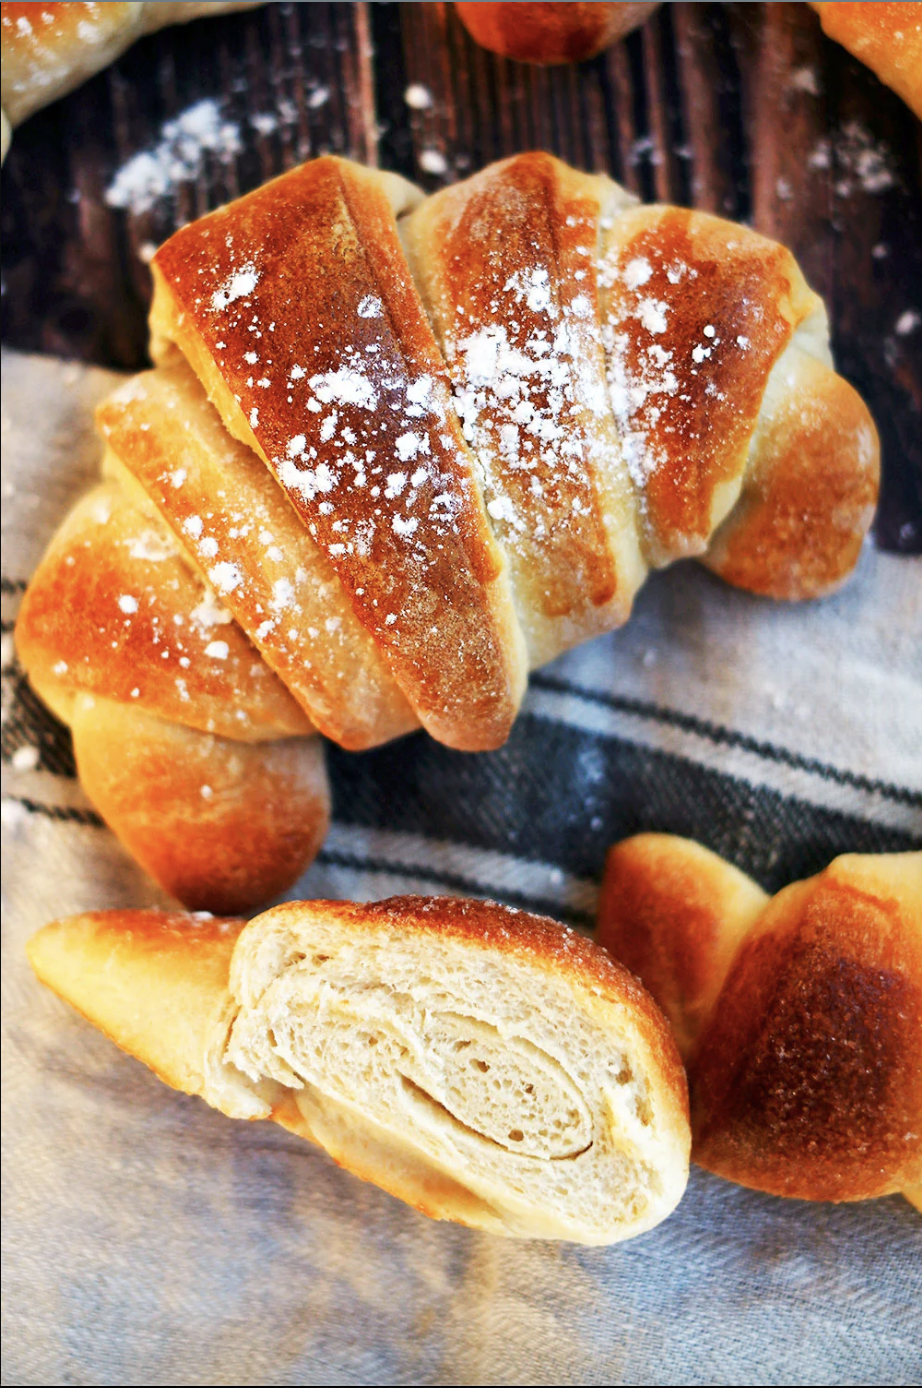


image 1/1 /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/single_image_test/test4freezed10layersyolov8_3rdround.jpg: 640x448 1 bread, 16.2ms
Speed: 5.0ms preprocess, 16.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict3
Prediction: bread, Confidence: 0.17


In [ ]:
#9th Round Prediction: FAILS with CROISSANT - Prediction Option C) Best weightt of Freezing first 10 layers from best weights of 3rd trainning round Yolov3

# Yolov11 2nd training round - BAD Predict using Yolo on an image: Really bad. Clasifica con un 0.80 de confianza que una ensaimada y que una magdalena son pan!

from ultralytics import YOLO
import os
import datetime
from PIL import Image
from IPython.display import display

# Load the trained model (3rd round performed better than 4th round)
#model = YOLO('/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/Yolov11 1sr trainnig round/6th_round_fine_tune_Freezed10layers_previous5thround_Yolov8/weights/best.pt')
              #/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/Yolov11 1sr trainnig round
model = YOLO('/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation/train/weights/best.pt')  # Path to the best latest trained weights

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/single_image_test/test4freezed10layersyolov8_3rdround.jpg'

image_path = os.path.abspath(image_path)

# Instead of display(Image(filename=image_path)), use:
img = Image.open(image_path)
display(img)

# Run inference on the image
results = model.predict(source=image_path, save=True, imgsz=640, conf=0.15)
# SEE HERE MORE ON THE conf=0.25 LEVEL AND WHAT DOES IT MEAN:
'''Only Keeping Confident Detections: Only detections where the model is
at least 25% confident that it has correctly identified an object will be included in the results.'''

# Get prediction class and confidence score
if results[0].boxes.cls is not None and results[0].boxes.conf is not None:
    prediction_class = model.names[int(results[0].boxes.cls[0])]
    confidence_score = results[0].boxes.conf[0]
    print(f"Prediction: {prediction_class}, Confidence: {confidence_score:.2f}")
else:
    print("No objects detected.")

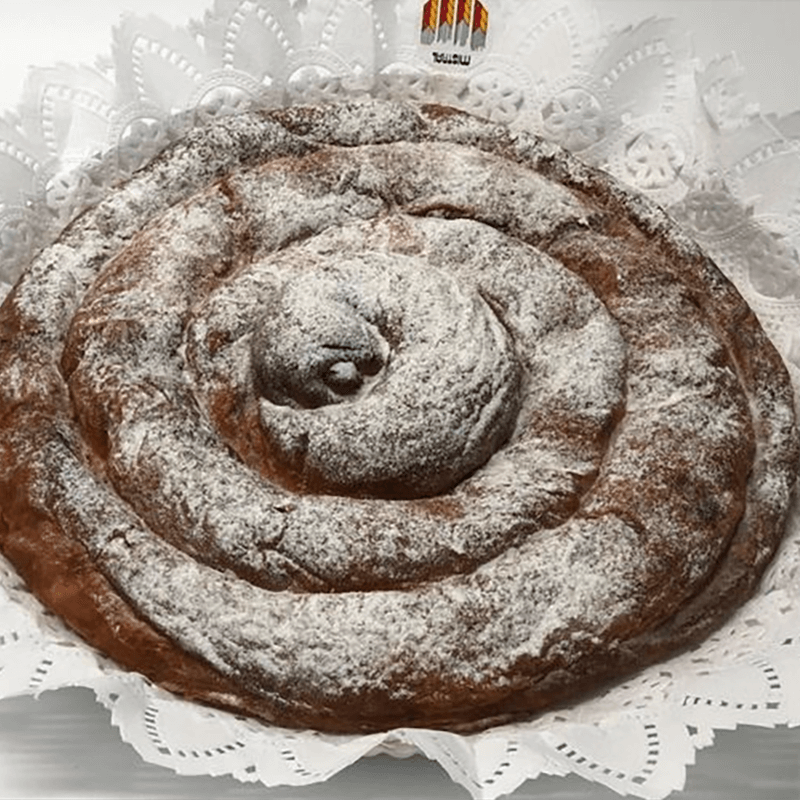


image 1/1 /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/single_image_test/test2freezed10layersyolov8_3rdround.jpg: 640x640 1 bread, 1 not_bread, 16.1ms
Speed: 10.9ms preprocess, 16.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
Prediction: bread, Confidence: 0.54


In [ ]:
#9th Round Prediction: ENSAINADA - Prediction Option C) Best weightt of Freezing first 10 layers from best weights of 3rd trainning round Yolov3

# Yolov11 2nd training round - BAD Predict using Yolo on an image: Really bad. Clasifica con un 0.80 de confianza que una ensaimada y que una magdalena son pan!

from ultralytics import YOLO
import os
import datetime
from PIL import Image
from IPython.display import display

# Load the trained model (3rd round performed better than 4th round)
#model = YOLO('/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/Yolov11 1sr trainnig round/6th_round_fine_tune_Freezed10layers_previous5thround_Yolov8/weights/best.pt')
              #/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/Yolov11 1sr trainnig round
model = YOLO('/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/9th_trainning_round_postdatarefinement_augmentation/train/weights/best.pt')  # Path to the best latest trained weights

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/single_image_test/test2freezed10layersyolov8_3rdround.jpg'

image_path = os.path.abspath(image_path)

# Instead of display(Image(filename=image_path)), use:
img = Image.open(image_path)
display(img)

# Run inference on the image
results = model.predict(source=image_path, save=True, imgsz=640, conf=0.15)
# SEE HERE MORE ON THE conf=0.25 LEVEL AND WHAT DOES IT MEAN:
'''Only Keeping Confident Detections: Only detections where the model is
at least 25% confident that it has correctly identified an object will be included in the results.'''

# Get prediction class and confidence score
if results[0].boxes.cls is not None and results[0].boxes.conf is not None:
    prediction_class = model.names[int(results[0].boxes.cls[0])]
    confidence_score = results[0].boxes.conf[0]
    print(f"Prediction: {prediction_class}, Confidence: {confidence_score:.2f}")
else:
    print("No objects detected.")

In [ ]:
# 10TH TRAINING ROUND - TRAINING BEST PREVIOUS WEIGHTS WITH CURRENT REFINED DATASET


from ultralytics import YOLO

# Cargar los mejores pesos del entrenamiento con mejores métrics (Yolov8 3rd round)
model = YOLO('/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/Yolov11 1sr trainnig round/fine_tune_freezing3rd round Yolov8/train2/weights/best.pt')  # Path to the best latest trained weights
# resume trainning from best weights train 2 10th round /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/10th_trainning_round_postdatarefinement_augmentation_bestweights6thround/train2

data_yaml_path = '/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat v1.1 -bread:not bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data.yaml'
# Entrenamiento con las capas congeladas
results = model.train(
    data=data_yaml_path,
    epochs=20,
    imgsz=640,
    lr0=0.00001,  # Lower learning rate for fine-tuning
    optimizer="SGD",
    momentum=0.7,
    weight_decay=0.00001,
    patience=12,
    mosaic=1,  # Enable mosaic at start
    augment=True,
    hsv_s=0.3,
    hsv_v=0.2,
    flipud=0.3,
    fliplr=0.3,
    project="/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/10th_trainning_round_postdatarefinement_augmentation_bestweights6thround",
    batch=16
)

print("Entrenamiento con capas congeladas finalizado.")


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat v1.1 -bread:not bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/10th_trainning_round_postdatarefinement_augmentation_bestweights6thround/train6/weights/best.pt, data=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat v1.1 -bread:not bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data.yaml, epochs=20, time=None, patience=12, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/10th_trainning_

train: Scanning /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat v1.1 -bread:not bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/train/labels/bread... 3780 images, 1 backgrounds, 0 corrupt: 100%|██████████| 3781/3781 [03:26<00:00, 18.29it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat v1.1 -bread:not bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/train/labels/bread.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat v1.1 -bread:not bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/validation/labels/bread... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [03:13<00:00,  3.10it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1pXRK-LXmHj8ehgL5X2PEMTiyVcJjBtzU/4Geek Final Project Pan Masa Madre 100%/Eat v1.1 -bread:not bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/data/validation/labels/bread.cache
Plotting labels to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/10th_trainning_round_postdatarefinement_augmentation_bestweights6thround/train5/labels.jpg... 
optimizer: SGD(lr=1e-05, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=1e-05), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-tr

       1/20      2.28G     0.3731     0.5927      1.069         16        640: 100%|██████████| 237/237 [01:44<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        600        600      0.856      0.877      0.942      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.18G     0.3769     0.5902      1.073         12        640: 100%|██████████| 237/237 [01:41<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.32it/s]

                   all        600        600      0.872      0.885      0.945      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.18G     0.3741     0.5944       1.07         13        640: 100%|██████████| 237/237 [01:42<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.58it/s]


                   all        600        600      0.839      0.902      0.943      0.941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.18G      0.376     0.5991       1.07         13        640: 100%|██████████| 237/237 [01:41<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.50it/s]

                   all        600        600      0.887      0.861      0.945      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.19G       0.37     0.5891      1.066         11        640: 100%|██████████| 237/237 [01:40<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        600        600      0.881       0.87      0.945      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.18G     0.3682     0.6015      1.065          9        640: 100%|██████████| 237/237 [01:39<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.90it/s]


                   all        600        600      0.882      0.862      0.944      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.2G     0.3759      0.583       1.07         10        640: 100%|██████████| 237/237 [01:38<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.79it/s]

                   all        600        600      0.868      0.882      0.945      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.2G     0.3681     0.5883      1.063         13        640: 100%|██████████| 237/237 [01:48<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.04it/s]

                   all        600        600      0.847      0.904      0.945      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.19G     0.3742     0.5899      1.076         12        640: 100%|██████████| 237/237 [01:38<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.84it/s]

                   all        600        600      0.891      0.858      0.944      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.18G     0.3734     0.5896       1.07         15        640: 100%|██████████| 237/237 [01:37<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.78it/s]

                   all        600        600       0.86      0.892      0.946      0.944


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.19G     0.4041     0.5889      1.247          5        640: 100%|██████████| 237/237 [01:37<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.31it/s]

                   all        600        600      0.819      0.891      0.928      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.19G     0.3933     0.5891      1.239          5        640: 100%|██████████| 237/237 [01:37<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.52it/s]

                   all        600        600      0.833      0.868      0.929      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.18G     0.4083     0.5685      1.256          5        640: 100%|██████████| 237/237 [01:35<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.75it/s]

                   all        600        600      0.824      0.888      0.931      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.18G     0.3879     0.5633      1.222          5        640: 100%|██████████| 237/237 [01:35<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.30it/s]

                   all        600        600       0.83      0.887      0.931      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.19G     0.3918      0.562      1.236          5        640: 100%|██████████| 237/237 [01:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.18it/s]

                   all        600        600      0.823      0.897      0.931      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.19G     0.3821     0.5554      1.214          5        640: 100%|██████████| 237/237 [01:35<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.75it/s]

                   all        600        600      0.819      0.898      0.931      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.18G     0.3833     0.5476      1.223          5        640: 100%|██████████| 237/237 [01:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.33it/s]

                   all        600        600      0.822      0.897       0.93      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.18G     0.3885     0.5495      1.228          5        640: 100%|██████████| 237/237 [01:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.52it/s]

                   all        600        600      0.816      0.905      0.932      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.19G     0.3832      0.544       1.22          5        640: 100%|██████████| 237/237 [01:36<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        600        600      0.816      0.908      0.933      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.19G     0.3851     0.5398      1.223          5        640: 100%|██████████| 237/237 [01:35<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.38it/s]

                   all        600        600      0.822      0.899      0.931      0.926



20 epochs completed in 0.609 hours.
Optimizer stripped from /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/10th_trainning_round_postdatarefinement_augmentation_bestweights6thround/train5/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/10th_trainning_round_postdatarefinement_augmentation_bestweights6thround/train5/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/10th_trainning_round_postdatarefinement_augmentation_bestweights6thround/train5/weights/best.pt...
Ultralytics 8

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]


                   all        600        600      0.881      0.879      0.935      0.935
                 bread        300        300      0.873      0.877      0.929      0.929
             not_bread        300        300      0.889      0.882      0.942      0.942
Speed: 0.3ms preprocess, 8.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/4Geek Final Project Pan Masa Madre 100%/Eat -bread- Blindly Network transfer model/Trainning pre-trained Yolo with LVIS data sample/Pretrain_Yolo_pretrained_Model_withLVIS/10th_trainning_round_postdatarefinement_augmentation_bestweights6thround/train5
Entrenamiento con capas congeladas finalizado.
